# Assignment 1: Deep learning with VGG16 {-}

This assignment aims at familiarizing you with training and testing VGG16 neural network. Here are the BASIC requirements of the assignment:

- Load the data.
- Process, normalize and resize the images.
- Build VGG16 model to perform an image classification task.
- Evaluate the performance of the model.

The dataset you will be working on is MNIST dataset. This is a dataset of 60,000 28x28 grayscale images of the 10 digits, along with a test set of 10,000 images.

### Submission {-}
The structure of submission folder should be organized as follows:

- ./\<StudentID>-assignment5-notebook.ipynb: Jupyter notebook containing source code.

The submission folder is named ML4DS-\<StudentID>-Assignment5 (e.g., ML4DS-2012345-Assigment5) and then compressed with the same name.
    
### Evaluation {-}
Assignment evaluation will be conducted on how you accomplish the assignment requirements. It is a plus if you have modeling steps other than the basic requirements and achieve an excellent model accuracy. In addition, your code should conform to a Python coding convention such as PEP-8.

### Deadline {-}
Please visit Canvas for details.

### Reference {-}:
- Simonyan, K., and Zisserman, A. 2014b. Very deep convolutional networks for large-scale image recognition. arXiv preprint arXiv:1409.1556, https://arxiv.org/abs/1409.1556.

## VGG16 architecture

![alt text](https://docs.google.com/uc?export=download&id=1XdD7iJxllG1XDwJA5LhOUp5R7LX3ltJr)

![alt text](https://docs.google.com/uc?export=download&id=1Ql49_n0OzrLNhVLTrUihuckvbetmOnut)

Some characteristics of the VGG16 architecture:
- Kernel size of all convolutional layers is 3x3.
- Numbers of filters of every block are sequentially 64, 128, 256, 512, 512 as in the figure.
- All activation functions are ReLUs, except the output layer which uses softmax.
- Dropout probability used after dense layers is 0.5.

In [39]:
# Import libraries
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

In [40]:
# Import libraries
import numpy as np
import tensorflow as tf
import keras 

In [41]:
# Load the MNIST dataset and split train/test
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

# Normalize data to the value range [0,1]
X_train, X_test = X_train/255.0, X_test/255.0

In [42]:
# Show shape of the training and test data
print("Train shape: X_train = " + str(X_train.shape) + ", y_train = " + str(y_train.shape))
print("Test shape: X_test = " + str(X_test.shape) + ", y_test = " + str(y_test.shape))

Train shape: X_train = (60000, 28, 28), y_train = (60000,)
Test shape: X_test = (10000, 28, 28), y_test = (10000,)


Image shape after being resized:  (32, 32)


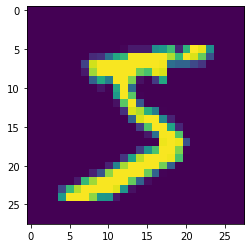

In [43]:
# Install OpenCV library to process images.
# !pip3 install opencv-python

### Resize an image
import cv2
resized_img = cv2.resize(X_train[0], dsize=(32,32)) # Resize the first sample in the training set to 32x32.
print("Image shape after being resized: ", resized_img.shape)

# Show an image
plt.imshow(X_train[0,:,:])
plt.show()

In [44]:
# Your code goes here
# Split train/valid from the training set
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=5)

print("Train shape: X_train = " + str(X_train.shape) + ", y_train = " + str(y_train.shape))
print("Val shape: X_val = " + str(X_val.shape) + ", y_val = " + str(y_val.shape))
print("Test shape: X_test = " + str(X_test.shape) + ", y_test = " + str(y_test.shape))

Train shape: X_train = (54000, 28, 28), y_train = (54000,)
Val shape: X_val = (6000, 28, 28), y_val = (6000,)
Test shape: X_test = (10000, 28, 28), y_test = (10000,)


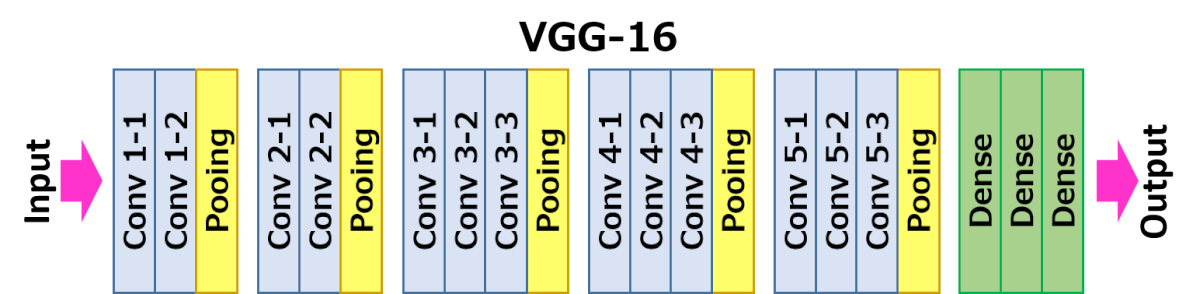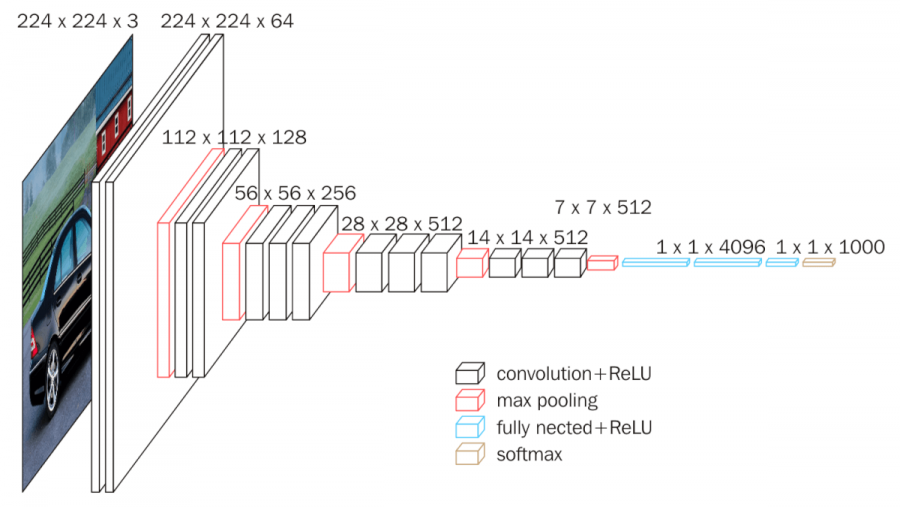

In [45]:
# Import library
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout, Flatten, Conv2D, MaxPooling2D, BatchNormalization

# Initialize VGG16 as an Sequential model.
# A Sequential model is appropriate for a plain stack of layers where each layer has exactly one input tensor and one output tensor.
VGG16 = Sequential(name='VGG16')

# Block 1
VGG16.add(Conv2D(filters=64, input_shape=(28,28,1), kernel_size=(3,3), padding='same', name='Block_1a_Conv')) # padding="same" means input and output have the same spatial dimension.
VGG16.add(Activation('relu')) # Add RELU activation function
VGG16.add(Conv2D(filters=64, kernel_size=(3,3), padding='same', name='Block_1b_Conv'))
VGG16.add(MaxPooling2D(pool_size=(3,3), strides=(2,2), padding='same', name='Block_1_MaxPool')) # Overlapping MaxPooling since the pooling kernel (3x3) is larger than the pooing stride (2x2).

# Block 2
VGG16.add(Conv2D(filters=128, kernel_size=(3,3), strides=(1,1), padding='same', name='Block_2a_Conv'))
VGG16.add(Activation('relu')) # Shorter way wot write: VGG16.add(Conv2D(..., activation='relu'))
VGG16.add(Conv2D(filters=128, kernel_size=(3,3), strides=(1,1), padding='same', name='Block_2b_Conv'))
VGG16.add(MaxPooling2D(pool_size=(3,3), strides=(2,2), padding='same', name='Block_2_maxPool'))

# Block 3
VGG16.add(Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), padding='same', name='Block_3a_Conv'))
VGG16.add(Activation('relu'))
VGG16.add(Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), padding='same', name='Block_3b_Conv'))
VGG16.add(Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), padding='same', name='Block_3c_Conv'))
VGG16.add(MaxPooling2D(pool_size=(3,3), strides=(2,2), padding='same', name='Block_3_maxPool'))
# Block 4
VGG16.add(Conv2D(filters=512, kernel_size=(3,3), strides=(1,1), padding='same', name='Block_4a_Conv'))
VGG16.add(Activation('relu'))
VGG16.add(Conv2D(filters=512, kernel_size=(3,3), strides=(1,1), padding='same', name='Block_4b_Conv',activation="relu"))
VGG16.add(Conv2D(filters=512, kernel_size=(3,3), strides=(1,1), padding='same', name='Block_4c_Conv',activation="relu"))
VGG16.add(MaxPooling2D(pool_size=(3,3), strides=(2,2), padding='same', name='Block_4_maxPool'))


# Block 5
VGG16.add(Conv2D(filters=512, kernel_size=(3,3), strides=(1,1), padding='same', name='Block_5a_Conv'))
VGG16.add(Activation('relu'))
VGG16.add(Conv2D(filters=512, kernel_size=(3,3), strides=(1,1), padding='same', name='Block_5b_Conv',activation="relu"))
VGG16.add(Conv2D(filters=512, kernel_size=(3,3), strides=(1,1), padding='same', name='Block_5c_Conv',activation="relu"))
VGG16.add(MaxPooling2D(pool_size=(3,3), strides=(2,2), padding='same', name='Block_5_maxPool'))


# Flatten
VGG16.add(Flatten()) # Reshape the tensor to 1D tensor so that it can be used as input of a fully connected (fc) layer

# Fully connected (FC) layer 1
VGG16.add(Dense(4096))
VGG16.add(Activation('relu')) # Shorter way wot write: VGG16.add(Dense(4096, activation='relu'))
VGG16.add(Dropout(rate=0.5)) # Dropout with drop rate. This is to force the layer to learn general features.

# Fully connected (FC) layer 2
VGG16.add(Dense(4096))
VGG16.add(BatchNormalization())
VGG16.add(Activation('relu'))
VGG16.add(Dropout(rate=0.5))

# Fully connected (FC) layer 3
VGG16.add(Dense(1000))
VGG16.add(BatchNormalization())    
VGG16.add(Activation('relu'))
VGG16.add(Dropout(rate=0.5)) 

# Fully connected (FC) layer 3
VGG16.add(Dense(10)) # Number of output classes
VGG16.add(Activation('softmax')) # Classification network often ends with softmax activation function.

#Model Summary
VGG16.summary()

# Example of non-trainable parameters: statistics in BatchNormalization layers. They're updated with mean and variance, but they're not "trained with backpropagation".

Model: "VGG16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Block_1a_Conv (Conv2D)      (None, 28, 28, 64)        640       
                                                                 
 activation_81 (Activation)  (None, 28, 28, 64)        0         
                                                                 
 Block_1b_Conv (Conv2D)      (None, 28, 28, 64)        36928     
                                                                 
 Block_1_MaxPool (MaxPooling  (None, 14, 14, 64)       0         
 2D)                                                             
                                                                 
 Block_2a_Conv (Conv2D)      (None, 14, 14, 128)       73856     
                                                                 
 activation_82 (Activation)  (None, 14, 14, 128)       0         
                                                             

In [46]:
# Compile the model
VGG16.compile(loss = tf.keras.losses.sparse_categorical_crossentropy, # Define loss function
                optimizer= tf.keras.optimizers.Adam(learning_rate=5e-5), metrics=['accuracy']) # Define initial learning rate and metrics.

In [47]:
### Create a callback ModelCheckpoint: this callback will save a better version of model every time the optimizer finds one. 
#### filepath: path to save the better model.
#### monitor: metrics to identify how a model is considered to be better.
#### mode='auto'/'max'/'min': to tell if the larger/smaller the metric, the better the model.
#### verbose: output log.
#### save_best_only: only save the best model instead off all better models along the training.

# Create a callback ModelCheckpoint. This callback will save the model when finding one better than the current best.
mc = keras.callbacks.ModelCheckpoint(filepath="epoch-{epoch:02d}.hdf5", # Path to save the model
                                     monitor='val_loss', # Metric to evaluate the model performance when looking for a better model.
                                     mode='min', # mode='auto'/'max'/'min': the monitor should be max/min to be better. 
                                                 # In auto mode, the mode is set to max if the quantities monitored are 'acc' or start with 'fmeasure' (f-score) and are set to min for the rest of the quantities.
                                     verbose=0, # Inform every time a better model is found and saved.
                                     save_best_only=True) # Only save the model if the current training epoch is the best. 'False' means save models of all training epochs

# Train the model. Using Colab for training
history = VGG16.fit(X_train, y_train, # Data feature and data label
                    batch_size=512, # Batch size
                    epochs=30, # Number of training epochs
                    validation_data=(X_val, y_val), # Validation set
                    callbacks=[mc]) # Use callback ModelCheckpoint during the training


Epoch 1/30
106/106 [==============================] - 26s 190ms/step - loss: 0.8249 - accuracy: 0.7043 - val_loss: 2.2543 - val_accuracy: 0.5763
Epoch 2/30
106/106 [==============================] - 20s 189ms/step - loss: 0.0708 - accuracy: 0.9785 - val_loss: 2.1411 - val_accuracy: 0.5335
Epoch 3/30
106/106 [==============================] - 20s 190ms/step - loss: 0.0485 - accuracy: 0.9848 - val_loss: 1.8190 - val_accuracy: 0.7122
Epoch 4/30
106/106 [==============================] - 20s 192ms/step - loss: 0.0348 - accuracy: 0.9888 - val_loss: 0.8831 - val_accuracy: 0.9703
Epoch 5/30
106/106 [==============================] - 21s 196ms/step - loss: 0.0268 - accuracy: 0.9917 - val_loss: 0.1649 - val_accuracy: 0.9883
Epoch 6/30
106/106 [==============================] - 21s 194ms/step - loss: 0.0206 - accuracy: 0.9934 - val_loss: 0.0661 - val_accuracy: 0.9833
Epoch 7/30
106/106 [==============================] - 21s 195ms/step - loss: 0.0140 - accuracy: 0.9958 - val_loss: 0.0381 - val_ac

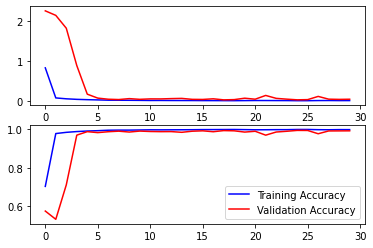

In [52]:
# Visualize training and validation performance
f,ax=plt.subplots(2,1) 

# Plot training and validation loss
ax[0].plot(history.history['loss'], color='b',label='Training Loss')
ax[0].plot(history.history['val_loss'],color='r',label='Validation Loss')

# Plot training and validation accuracy
ax[1].plot(history.history['accuracy'],color='b',label='Training Accuracy')
ax[1].plot(history.history['val_accuracy'],color='r',label='Validation Accuracy')

plt.legend()

In [53]:
# Let us load a saved model and evaluate its performance on the test set
model = tf.keras.models.load_model("/content/epoch-23.hdf5")
result = VGG16.evaluate(X_test, y_test) # If unspecified, batch_size will default to 32

313/313 [==============================] - 3s 9ms/step - loss: 0.0441 - accuracy: 0.9905


In [54]:
# Show the model performance
print(VGG16.metrics_names) # result[0] is loss, result[1] is accuracy. The metrics are defined in VGG16.complie(...)
print("Loss and accuracy on the test set: loss = {}, accuracy = {}".format(result[0],result[1]))

['loss', 'accuracy']
Loss and accuracy on the test set: loss = 0.04414321482181549, accuracy = 0.9904999732971191


In [55]:
# This is to delete all saved models (*.hdf5) in the current directory

'''import os
import glob
# Get a list of all the file paths that ends with .txt from in specified directory
fileList = glob.glob('*.hdf5')
# Iterate over the list of filepaths & remove each file.
for filePath in fileList:
  try:
    os.remove(filePath)
  except:
    print("Error while deleting file : ", filePath)'''

'import os\nimport glob\n# Get a list of all the file paths that ends with .txt from in specified directory\nfileList = glob.glob(\'*.hdf5\')\n# Iterate over the list of filepaths & remove each file.\nfor filePath in fileList:\n  try:\n    os.remove(filePath)\n  except:\n    print("Error while deleting file : ", filePath)'